## An example how to calculate sdg 11.2 indicator for Friedrichshain (Berlin)

In [1]:
import os
import sys
project_path = os.path.abspath('../')
sys.path.append(project_path)
import geopandas as gpd
from matplotlib import pyplot as plt
from ptac import accessibility as accessibility
from ptac import osm as osm

Load stops and population data and generate boundary from population data.
The boundary is necessary to download the network afterwards.

In [2]:
stops = gpd.read_file(project_path + "/data/pt_example.gpkg")
population_points = gpd.read_file(project_path + "/data/population_example.gpkg")
boundary_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[population_points.unary_union.convex_hull])

Plot population and pt stops

hi


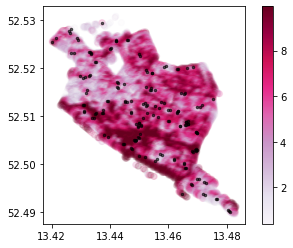

In [3]:

ax = population_points.plot(column= "pop", cmap='PuRd', legend=True, alpha=0.1)

stops.plot(color="black", ax=ax, markersize=6, alpha=0.6)
print("hi")

Calculate sum of population in the focus area

In [4]:
population_sum = population_points["pop"].sum()

print(f"Overall sum of population is: {population_sum}")

Overall sum of population is: 88270.7075406313


Now calculate the accessibility from population point data to stations. If you do not pass a network_gdf dataset
, it will be downloaded automatically based on the bounding box.

In [4]:
accessibility_output = accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops,
                                  boundary_geometries=boundary_gdf,
                                  network_gdf=None,
                                  verbose=5)

No street network was specified. Loading osm network..

Preparing street network for routing.
Starting UrMoAC to calculate accessibilities

UrMoAC request: java -jar -Xmx12g C:\Simon\git\PtAC\ptac/UrMoAccessibilityComputer-0.1-PRERELEASE-shaded.jar --from file;"C:\Users\niel_sm/.ptac/origins.csv" --shortest --to file;"C:\Users\niel_sm/.ptac/destinations.csv" --mode foot --time 35580 --epsg 32633 --ext-nm-output "file;C:\Users\niel_sm/.ptac/sdg_output.txt" --verbose --threads 4 --dropprevious --date 20200915 --net "file;tmp/network.csv"

   index       pop    x_coord    y_coord                        geometry  \
0      0  1.889245  13.441986  52.530828  POINT (394314.570 5821221.644)   
1      1  2.585283  13.441716  52.530558  POINT (394295.644 5821192.064)   
2      2  6.065472  13.437135  52.529480  POINT (393982.293 5821078.889)   
3      3  6.065472  13.437404  52.529480  POINT (394000.573 5821078.493)   
4      4  1.988679  13.440099  52.529480  POINT (394183.374 5821074.539)   



the output looks like this:

In [ ]:
print(accessibility_output.head(5))

It is also possible to download the network before calculating

In [5]:
network_gdf = osm.get_network(boundary_gdf)

Then, we can have a look at the network..

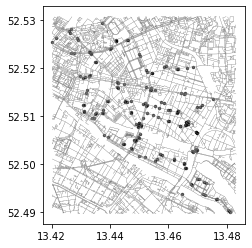

In [7]:
#network_gdf.plot(color="grey", makersize= 4)

ax = stops.plot(color="black", markersize=6, alpha=0.6)
network_gdf.plot(color="grey", linewidth=0.2, ax=ax)
plt.show()

.. and store it to disk. You are able to drag and drop this data set into your GIS software.

In [8]:
network_gdf.to_file("friedrichshain_network.gpkg", driver="GPKG")

Now, we can calculate again with our stored network

In [ ]:
network_gdf = gpd.read_file("friedrichshain_network.gpkg")


Now, we can calculate again with our stored network

In [8]:
network_gdf = gpd.read_file("friedrichshain_network.gpkg")

accessibility_output= accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops,
                                  boundary_geometries=boundary_gdf,
                                  network_gdf=network_gdf,
                                  verbose=5)

Street network provided

Preparing street network for routing.


ValueError: The column label 'street_type' is not unique.

Select starting points which are within 500 meters from the next station

In [ ]:
accessibility_output = accessibility_output[accessibility_output["distance_pt"]<500]

print(accessibility_output.head(10))

Calculate sum of population with access to pt within 500 meters

In [ ]:
sum_pop_with_access = accessibility_output["pop"].sum()
print(sum_pop_with_access)

Calculate the actual indicator and print the result

In [ ]:
sdg_indicator = accessibility.calculate_sdg(population_sum,sum_pop_with_access)
print(" %s percent of the population have access"%sdg_indicator)

Plot result as a map

In [ ]:
accessibility_output.plot(column='distance_pt', cmap='OrRd')
plt.show()
